Missing values in the dataset before imputation:
YearsExperience    2
Salary             0
dtype: int64

Missing values in the dataset after imputation:
YearsExperience    0
Salary             0
dtype: int64

Predicted salary for 12 years of experience: $139980.89


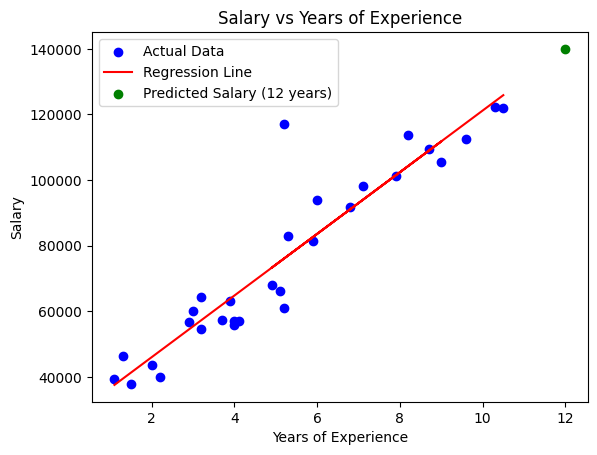

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/salary.csv')

# Check for missing values
print("Missing values in the dataset before imputation:")
print(data.isnull().sum())

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')  # Use mean to fill missing values
data[['YearsExperience', 'Salary']] = imputer.fit_transform(data[['YearsExperience', 'Salary']])

# Check for missing values after imputation
print("\nMissing values in the dataset after imputation:")
print(data.isnull().sum())

# Prepare the data
X = data['YearsExperience'].values.reshape(-1, 1)  # Features
y = data['Salary'].values  # Target

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the salary for 12 years of experience
years_experience_12 = np.array([[12]])
predicted_salary = model.predict(years_experience_12)

print(f"\nPredicted salary for 12 years of experience: ${predicted_salary[0]:.2f}")

# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(years_experience_12, predicted_salary, color='green', label='Predicted Salary (12 years)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()